### **1.0) Bibliotecas Necessárias**

In [1]:
#######################################################################
# Bibliotecas Principais
#######################################################################
import pandas as pd
from pathlib import Path
import pickle 
from datetime import datetime
from datetime import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display, Markdown   
from sklearn.ensemble import IsolationForest
from pywaffle import Waffle
import calplot
from scipy.stats.mstats import winsorize
from scipy import special


In [2]:
def WaffleChart ( dictDados, strTitulo, iVertical = False, iTamnhoIcone = 12, icon = [], cmapName = 'Pastel2', iLargura = 10, iAltura = 6, iLinhas = 5, iColunas = 20 ):
    plt.figure  (
                cmap_name = cmapName, 
                font_size = iTamnhoIcone, 
                vertical = iVertical,
                FigureClass = Waffle, 
                figsize = (iLargura, iAltura),
                rows = iLinhas, 
                columns = iColunas,
                values = dictDados, 
                icons = icon, 
                title = {
                        'label': strTitulo, 
                        'loc': 'left',
                        'fontdict': {
                                        'fontsize': 12, 
                                        "fontweight":"bold"
                                    }
                        },
                labels = ["{0} ({1} Registros)".format(k, v) for k, v in dictDados.items()],
                legend = {
                            'loc': 'lower left', 
                            'bbox_to_anchor': (0, -0.2), 
                            'ncol': len(dictDados), 
                            'framealpha': 0
                        }
                )

#### **2.0) Definições Globais**

In [3]:
########################################################################
# Definições Gerais
########################################################################
Arquivo = "https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv"
colors = ["blue", "green", "red", "black", "tomato", "orange", "sienna", "goldenrod", "teal", "steelblue", "deeppink", "olive"]

#### **3.0) Leitura dos Dados Originais**

In [4]:
DadosBase = pd.read_csv ( Arquivo ) 
DadosBase = DadosBase.dropna(how = 'any', axis = 0)
dfOriginal = DadosBase.copy()

#### **4.0) Ajustes e Criação de Novos Dados**

In [5]:
DadosBase['timestamp'] = pd.to_datetime(DadosBase['timestamp'])
DadosBase["Date"] = DadosBase['timestamp'].dt.date
DadosBase['Date'] = pd.to_datetime(DadosBase['Date'])

#### **5.0) Comportamento dos Dados em Todos os Anos**

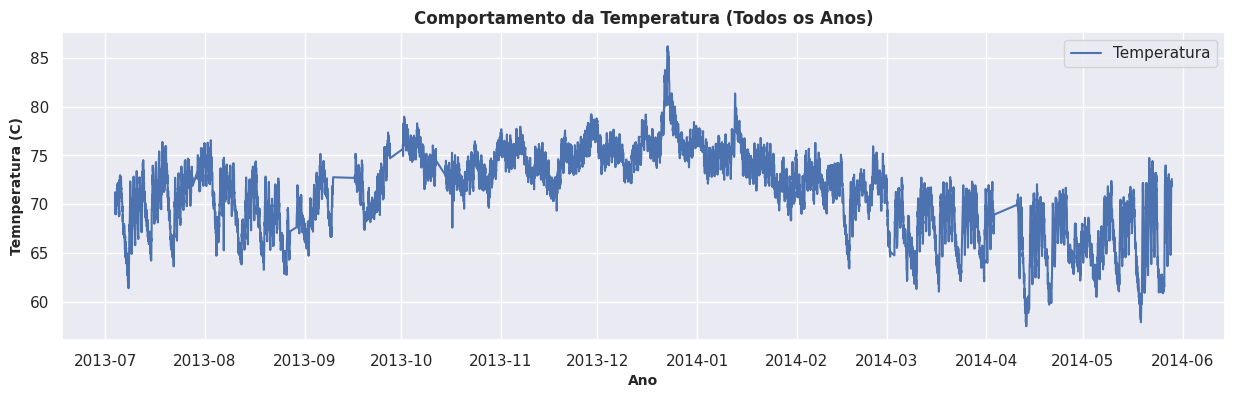

In [6]:
df_plot = DadosBase[["timestamp",'value']].copy()
df_plot = df_plot.set_index('timestamp')

plt.figure(figsize=(15, 4))
sns.set_theme(style="darkgrid")

plt.plot(df_plot.index, df_plot["value"], label='Temperatura')
plt.title("Comportamento da Temperatura (Todos os Anos)", fontsize=12, fontweight="bold" )
plt.ylabel('Temnperatura (C)', fontweight="bold", fontsize=10)
plt.xlabel ('Ano', fontweight="bold", fontsize=10)

plt.legend()
plt.show ()

In [7]:
df_plot = DadosBase[["timestamp",'value']].copy()
df_plot = df_plot.set_index('timestamp')
# df_plot

In [8]:
dfOriginal['timestamp'] = pd.to_datetime(dfOriginal['timestamp'])
dfOriginal['Date'] = dfOriginal['timestamp'].dt.date
dfOriginal = dfOriginal.drop('timestamp', axis=1)
dfOriginal['Date'] = pd.to_datetime(dfOriginal['Date'])
dfOriginal = dfOriginal.set_index('Date')
# dfOriginal


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


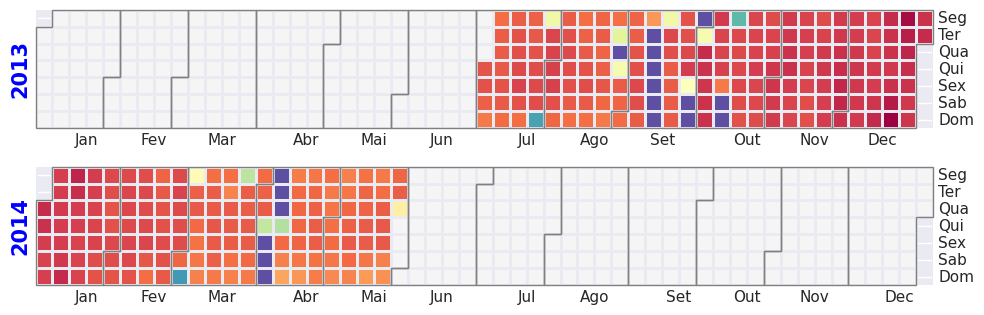

In [9]:

ylabel_kws = dict   (
                        fontsize=30,
                        color='gray',
                        fontname='Arial',
                        fontweight='bold',
                        ha='center'
                    )

ylabel_kws.update(ylabel_kws)
calplot.calplot (
                    dfOriginal['value'], 
                    cmap = 'Spectral_r', 
                    colorbar=False,
                    yearlabels = True,  
                    yearlabel_kws = {
                                        'fontname':'Arial',
                                        'fontsize': 15, 
                                        'color': 'blue'
                                    }, 
                    daylabels = [
                                    'Seg', 'Ter', 
                                    'Qua', 'Qui', 
                                    'Sex', 'Sab', 
                                    'Dom'
                                ],
                    monthlabels = [
                                    'Jan', 'Fev', 'Mar', 
                                    'Abr', 'Mai', 'Jun',
                                    'Jul', 'Ago', 'Set',
                                    'Out', 'Nov', 'Dec']
                );

#### **6.0) Histograma dos Dados**

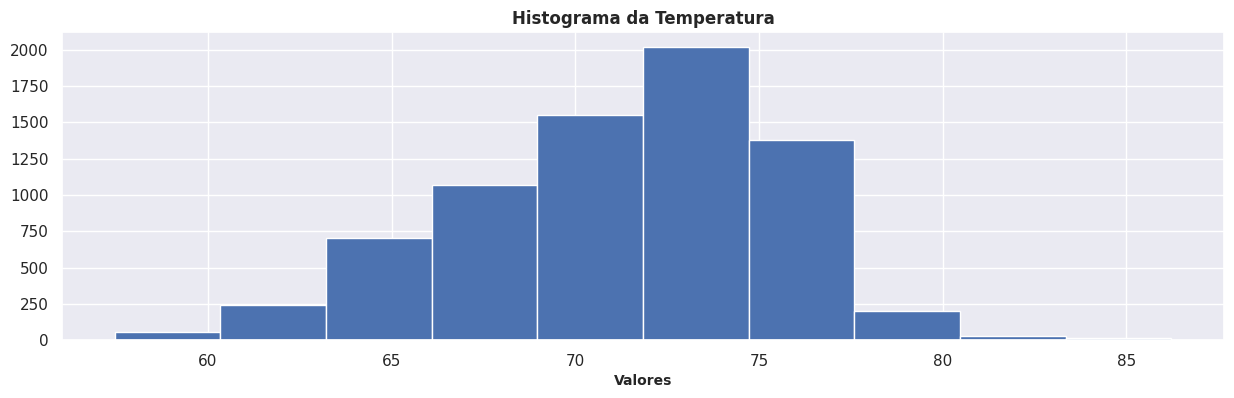

In [10]:
df_plot = DadosBase[["timestamp",'value']].copy()
df_plot = df_plot.set_index('timestamp')

Media = df_plot.mean()
DesvioPadrao = df_plot.std()

plt.figure(figsize=(15, 4))
sns.set_theme(style="darkgrid")
plt.hist(df_plot)

plt.title("Histograma da Temperatura", fontsize=12, fontweight="bold" )
# plt.ylabel('Temnperatura (C)', fontweight="bold", fontsize=10)
plt.xlabel ('Valores', fontweight="bold", fontsize=10)
plt.show ()

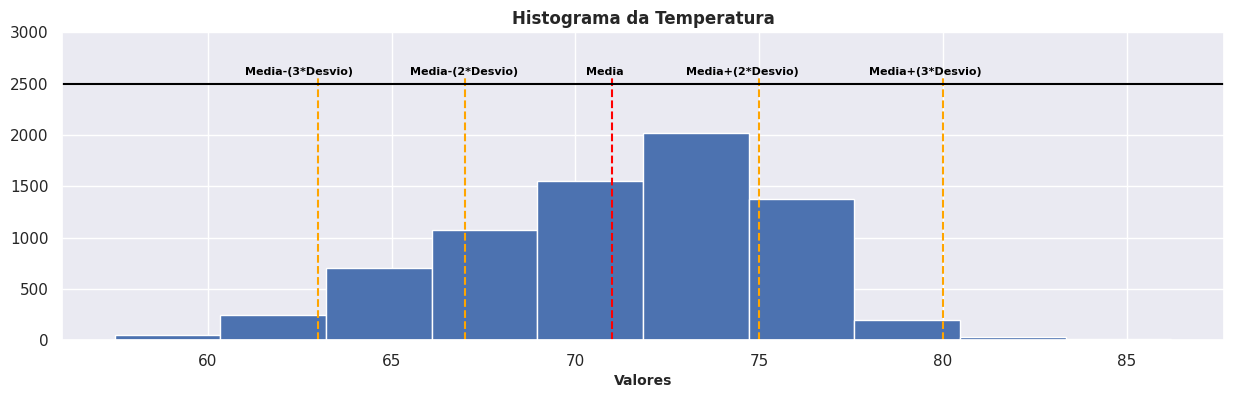

In [11]:
df_plot = DadosBase[["timestamp",'value']].copy()
df_plot = df_plot.set_index('timestamp')

Media = df_plot.mean()
DesvioPadrao = df_plot.std()

plt.figure(figsize=(15, 4))
sns.set_theme(style="darkgrid")
plt.hist(df_plot)

plt.axvline(x = 71, ymin = 0, ymax = 0.85, color ='red', linestyle='--' ) 
plt.axvline(x = 75, ymin = 0, ymax = 0.85, color ='orange', linestyle='--' )  
plt.axvline(x = 80, ymin = 0, ymax = 0.85, color ='orange', linestyle='--' )  
plt.axvline(x = 67, ymin = 0, ymax = 0.85, color ='orange', linestyle='--' )  
plt.axvline(x = 63, ymin = 0, ymax = 0.85, color ='orange', linestyle='--' )  
plt.axhline(2500, color ='black') 

plt.ylim (0, 3000)
plt.text(70.3, 2580, "Media", color ='black', fontsize = 8, fontweight="bold")
plt.text(73, 2580, "Media+(2*Desvio)", color ='black', fontsize = 8, fontweight="bold")
plt.text(78, 2580, "Media+(3*Desvio)", color ='black', fontsize = 8, fontweight="bold")

plt.text(65.5, 2580, "Media-(2*Desvio)", color ='black', fontsize = 8, fontweight="bold")
plt.text(61, 2580, "Media-(3*Desvio)", color ='black', fontsize = 8, fontweight="bold")

plt.title("Histograma da Temperatura", fontsize=12, fontweight="bold" )
# plt.ylabel('Temnperatura (C)', fontweight="bold", fontsize=10)
plt.xlabel ('Valores', fontweight="bold", fontsize=10)
plt.show ()

#### **7.0) Avaliação do Lag da Série Temporal**

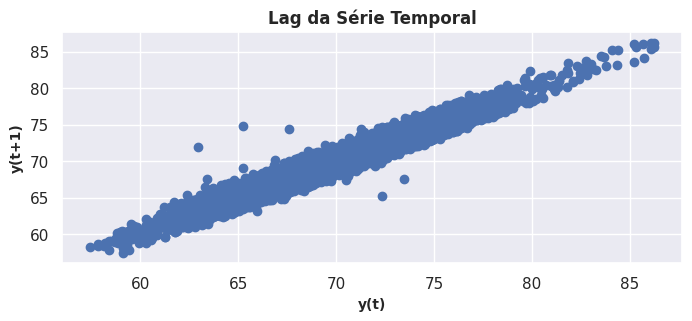

In [12]:
plt.figure(figsize=(8, 3))
sns.set_theme(style="darkgrid")

pd.plotting.lag_plot(DadosBase['value'])
plt.title("Lag da Série Temporal", fontsize=12, fontweight="bold" )
plt.ylabel('y(t+1)', fontweight="bold", fontsize=10)
plt.xlabel ('y(t)', fontweight="bold", fontsize=10)
plt.show ()


#### **8.0) Conhecendo os Outliers**

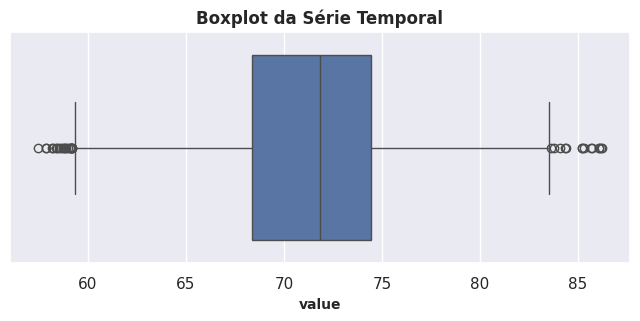

In [13]:
plt.figure(figsize=(8, 3))
sns.set_theme(style="darkgrid")

sns.boxplot(data = DadosBase, x = 'value')

plt.title("Boxplot da Série Temporal", fontsize=12, fontweight="bold" )
plt.xlabel ('value', fontweight="bold", fontsize=10)
plt.show ()
